# Train

In [17]:
import sagemaker
from sagemaker.tensorflow import TensorFlow, TrainingCompilerConfig

# Configurar a sessão
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

tensorflow_estimator = TensorFlow(
                        entry_point              = 'train_dsnu.py',
                        source_dir               = './',
                        role                     = role,
                        instance_count           = 1,
                        instance_type            = 'ml.m5.large',
                        framework_version        ='2.11.0',
                        py_version               = 'py39',
                        hyperparameters          = {'epochs'       : 100,
                                                    'batch_size'   : 64,
                                                    'learning_rate': 0.0001},
                        enable_sagemaker_metrics = True
)

tensorflow_estimator.fit("s3://modelos-challenge/modelo_final_v2/dados/")

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: tensorflow-training-2025-10-05-23-35-14-668


2025-10-05 23:35:19 Starting - Starting the training job...
2025-10-05 23:35:34 Starting - Preparing the instances for training...
2025-10-05 23:35:57 Downloading - Downloading input data...
2025-10-05 23:36:37 Downloading - Downloading the training image.........
2025-10-05 23:38:03 Training - Training image download completed. Training in progress.2025-10-05 23:38:07.804055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 23:38:07.906580: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2025-10-05 23:38:07.907225: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, fut

# Deploy

In [34]:
import matplotlib.pyplot as plt

INFO:matplotlib.font_manager:generated new fontManager


In [25]:
import sagemaker
from sagemaker.tensorflow import TensorFlowModel
import pandas as pd
import numpy as np

# Configurar a sessão
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

tf_model = TensorFlowModel(
                        model_data               = 's3://sagemaker-us-east-1-435133245123/tensorflow-training-2025-10-05-23-35-14-668/model/tensorflow_model/1/model.tar.gz',
                        role                     = role,
                        framework_version        ='2.11.0',
                        entry_point = 'inference_script_dsnu.py',
                        sagemaker_session = sagemaker_session
)

In [26]:
predictor = tf_model.deploy(
    initial_instance_count = 1,
    instance_type = 'ml.m5.large'
)

INFO:sagemaker.tensorflow.model:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating model with name: tensorflow-inference-2025-10-05-23-57-27-801
INFO:sagemaker:Creating endpoint-config with name tensorflow-inference-2025-10-05-23-57-28-440
INFO:sagemaker:Creating endpoint with name tensorflow-inference-2025-10-05-23-57-28-440


-----!

# Apresentação

## .

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd  # Opcional, para DataFrame

In [110]:
# Rodar para dados anormais:
# -------- TESTANDO O ENDPOINT

# Carregar os dados
df_union_1 = pd.read_csv('df_atuador1_dsnu_100ms.csv')
df_union_1_filtered = df_union_1.reset_index(drop=True)
df_normal = df_union_1_filtered[df_union_1_filtered['timestamp_horario_utc'] < '2025-09-05 00:15:50.767']

df_anormal = df_union_1_filtered[(df_union_1_filtered['timestamp_horario_utc'] > '2025-09-05 00:15:50.0') &
                                (df_union_1_filtered['timestamp_horario_utc'] < '2025-09-05 00:16:50.767')]

data = df_anormal

# Usar 'Avancado 1S2' diretamente como entrada e saída
data['timestamp_unix'] = data[['Avancado 1S2']]
X = data[['timestamp_unix']].values
y = data['Avancado 1S2'].values

# Normalizar os dados
X_scaled = X
y_scaled = y.reshape(-1, 1)

# Criar janelas de tempo
def create_dataset(X, y, time_steps=1):
    X_data, y_data = [], []
    for i in range(len(X) - time_steps):
        X_data.append(X[i:i+time_steps])
        y_data.append(y[i+time_steps])
    return np.array(X_data), np.array(y_data)

time_steps = 10
X_data_anormal, y_data_anormal = create_dataset(X_scaled, y_scaled, time_steps)

/tmp/ipykernel_177/4209613311.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp_unix'] = data[['Avancado 1S2']]


In [127]:
# Rodar para dados normais:
# -------- TESTANDO O ENDPOINT

# Carregar os dados
df_union_1 = pd.read_csv('df_atuador1_dsnu_100ms.csv')
df_union_1_filtered = df_union_1.reset_index(drop=True)
df_normal = df_union_1_filtered[df_union_1_filtered['timestamp_horario_utc'] < '2025-09-05 00:15:50.767']

df_anormal = df_union_1_filtered[(df_union_1_filtered['timestamp_horario_utc'] > '2025-09-05 00:15:50.0') &
                                (df_union_1_filtered['timestamp_horario_utc'] < '2025-09-05 00:16:50.767')]

data = df_normal

# Usar 'Avancado 1S2' diretamente como entrada e saída
data['timestamp_unix'] = data[['Avancado 1S2']]
X = data[['timestamp_unix']].values
y = data['Avancado 1S2'].values

# Normalizar os dados
X_scaled = X
y_scaled = y.reshape(-1, 1)

# Criar janelas de tempo
def create_dataset(X, y, time_steps=1):
    X_data, y_data = [], []
    for i in range(len(X) - time_steps):
        X_data.append(X[i:i+time_steps])
        y_data.append(y[i+time_steps])
    return np.array(X_data), np.array(y_data)

time_steps = 10
X_data_normal, y_data_normal = create_dataset(X_scaled, y_scaled, time_steps)

/tmp/ipykernel_177/573534093.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp_unix'] = data[['Avancado 1S2']]


## Monitoramento

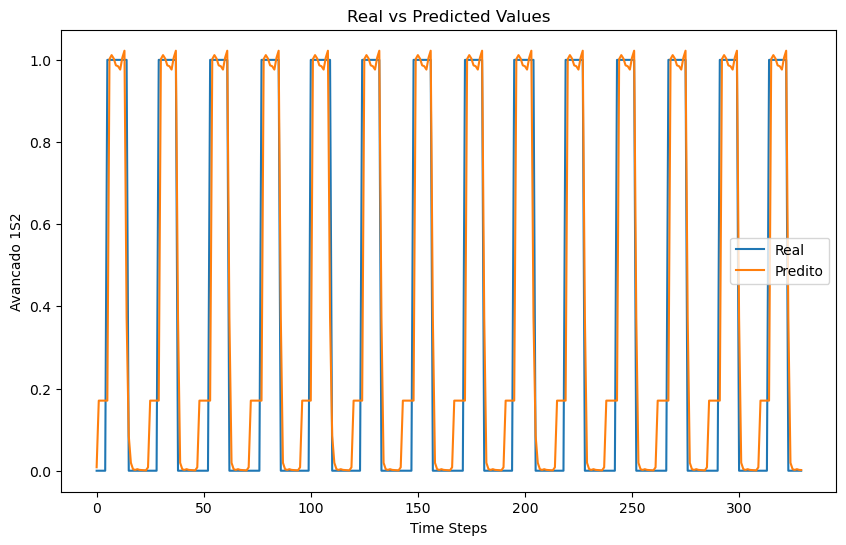

In [130]:
# Make predictions
y_pred = predictor.predict(X_data_normal)  # X_data should be in the correct format
y_pred_rescaled = np.array(y_pred['predictions']).flatten()  # Extract numerical predictions
y_test_rescaled = y_data_normal




# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_rescaled, label='Predito')
plt.xlabel('Time Steps')
plt.ylabel('Avancado 1S2')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

In [131]:
# métrica de erro
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.043106921624248805


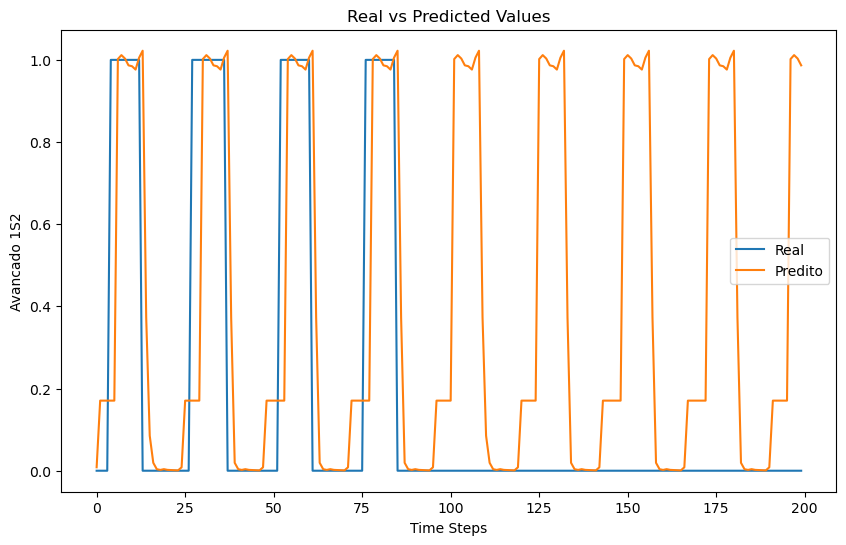

In [146]:
# Make predictions
y_pred = predictor.predict(X_data_normal[:200])  # X_data should be in the correct format
y_pred_rescaled = np.array(y_pred['predictions']).flatten()  # Extract numerical predictions
y_test_rescaled = y_test_rescaled[:200]
y_test_rescaled = y_data_anormal


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled[:200], label='Real')
plt.plot(y_pred_rescaled, label='Predito')
plt.xlabel('Time Steps')
plt.ylabel('Avancado 1S2')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

In [137]:
# métrica de erro
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_rescaled[:200], y_pred_rescaled[:200])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.24310245612179543


## Simulação

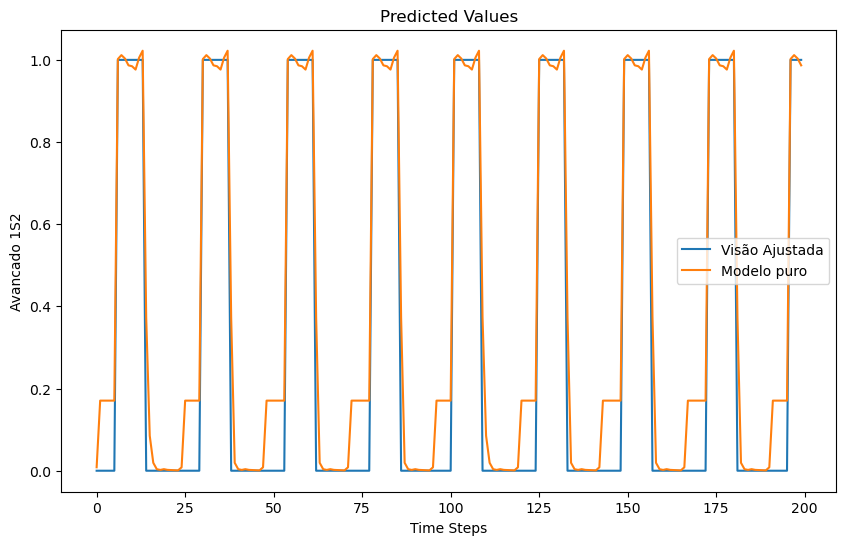

In [147]:
# Simulando
y_pred_rescaled_ajust = y_pred_rescaled.copy()
y_pred_rescaled_ajust[y_pred_rescaled_ajust>0.7]=1
y_pred_rescaled_ajust[y_pred_rescaled_ajust<=0.7]=0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_pred_rescaled_ajust, label='Visão Ajustada')
plt.plot(y_pred_rescaled, label='Modelo puro')
plt.xlabel('Time Steps')
plt.ylabel('Avancado 1S2')
plt.title('Predicted Values')
plt.legend()
plt.show()